# 7DaysOfCode - Machine Learning 

## Day-2: Data Pre-processing

Pre-processing is a crucial step in the Machine Learning workflow as it ensures the quality of our data. This step involves cleaning, organizing, and transforming raw data into high-quality data that can be used to train models. Properly preprocessed data directly impacts the ability of our models to learn and make accurate predictions.

Some of the data preprocessing steps, such as handling null values and duplicates, were already addressed earlier in this documentation. In this step, I will focus on enriching the dataset, standardization, and checking for multicollinearity. 

In [161]:

#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve, LearningCurve

#metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, auc, roc_curve, average_precision_score
from sklearn.exceptions import FitFailedWarning


#resampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import NearMiss, TomekLinks
from imblearn.combine import SMOTETomek

#others

import time
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from collections import Counter
import pickle


pd.set_option('display.max_columns', None)

In [46]:
spotify_df = pd.read_csv("C:/Users/SAMSUNG/OneDrive/Documentos/GitHub/7DaysOfCode_SpotifyML/data/day_one.csv")

In [47]:
spotify_df.shape

(89740, 20)

## Creating the binary class

As I am dealing with a binary classification problem, where the goal is to predict whether a song will be popular or not, I need to encode the 'popularity' column as the target variable. I have chosen a threshold of 70, which means that songs with a popularity score above 70 will be considered popular and encoded as 1, while those with a score below this threshold will be considered not popular and encoded as 0.

In [48]:
#target value: popularity
spotify_df['popularity'] = spotify_df['popularity'].apply(lambda x: 1 if x > 70 else 0)

## Feature engineering
Feature engineering is the process of creating new featurs or transforming existing features in a dataset to improve the perfomance of machine learning models. In this step I will remove irrelevant columns and create new features.


In [49]:
spotify_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,1,3.844433,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0,2.493500,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0,3.513767,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,1,3.365550,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,1,3.314217,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In this initial stage,  I will be working exclusively with numeric data in this dataset. I have chosen to exclude categorical variables for some reasons:

i. Limited contribution to model performance: Variables such as track_id, album_name, and track_name are unlikely to significantly improve the performance of the model, as they may not contain meaningful numerical information for the model to learn from.

ii. High cardinality of variables: Variables like genre and artist may have a large number of unique categories, which can result in increased computational overhead and additional data cleaning steps. Considering the potential gains in model performance, dealing with these variables may be time-consuming and cumbersome.

By excluding these categorical variables, I can streamline the data preparation process and focus on working with numerical data, which may be more relevant for the specific modeling task at hand.

In [50]:
spotify_df = spotify_df.drop(columns = ['track_id', 'album_name', 'track_name', 'artists', 'track_genre'])

In [51]:
spotify_df.head(10)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1,3.844433,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,0,2.493500,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,0,3.513767,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,1,3.365550,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,1,3.314217,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
5,0,3.570667,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4
6,1,3.823333,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3
7,1,4.049100,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4
8,1,3.160217,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4
9,0,3.426567,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4


### One Hot enconding

Handling categorical data is a critical step in the machine learning workflow. Even though I have excluded categorical data with high cardinality, there are still some remaining variables that need to be addressed. Certain machine learning models are unable to work with categorical data directly, and it's important to avoid misinterpretation of categorical variables as continuous ones, such as interpreting key as an integer variable when it is actually a categorical variable. To address this, I will be utilizing One Hot Encoding to appropriately represent these categorical variables in the dataset.

In [52]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix, drop_first=True) # Drop the first column to avoid multicollinearity
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [53]:
#getting the dumies
spotify_df = onehot_encode(spotify_df, 'mode', 'mode')
spotify_df = onehot_encode(spotify_df, 'explicit', 'isExplicit')
spotify_df = onehot_encode(spotify_df, 'key', 'key')
spotify_df = onehot_encode(spotify_df, 'time_signature', 'time_signature')

In [54]:
spotify_df.shape

(89740, 28)

In [55]:
spotify_df.head()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode_1,isExplicit_True,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,1,3.844433,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,2.493500,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,3.513767,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,3.365550,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,3.314217,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0



## Scaling

In this step, I will perform standardization. Standardization involves transforming the values of the dataset such that the mean of the values is 0 and the standard deviation is 1. This is crucial because many machine learning models, including those that use the gradient descent algorithm, are sensitive to the scale of the input features. Having columns with different scales can result in issues such as overshooting or loss of computational efficiency. Standardization helps to mitigate these problems and ensures that the data is normalized to a common scale, making it more suitable for machine learning model training and inference.

In [56]:
spotify_df.columns

Index(['popularity', 'duration_ms', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'mode_1', 'isExplicit_True', 'key_1', 'key_2',
       'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11', 'time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5'],
      dtype='object')

In [57]:
y = spotify_df.loc[:, 'popularity']
X = spotify_df.drop('popularity', axis = 1)

In [58]:
#standardization
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

## Day-3: Train Test Validation

### Train-test sets

Today, my focus is on splitting the dataset into train, test, and validation sets. In machine learning, we split the data into train and test sets to allow our model to learn from the patterns in the training data. Once the learning is done, the model can then make predictions on unseen data from the test set. This helps us evaluate how well the model can generalize to new, unseen data and assess its performance.This step is important to avoid issues with overfitting or underfitting, which can negatively impact the model's ability to generalize to new data and result in lower accuracy.

A common practice is to allocate around 80% of the data for training and 20% for testing. This is the approach I will be using to split the dataset.

In [59]:
print(len(X_std))
print(len(y))

89740
89740


In [60]:
y.value_counts(normalize=True)

0    0.969545
1    0.030455
Name: popularity, dtype: float64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state = 42, shuffle=True)

### Cross-Validation

One potential drawback of simply splitting the dataset into train/test sets is that the splitting may not be random, which can lead to issues with overfitting. To address this concern, I will be performing a cross-validation step. Cross-validation involves creating multiple train/test sets by splitting the data into k subsets, and training the model on k-1 of these subsets. There are various cross-validation methods available, and for this exercise, I will be using the StratifiedKFold method.

The `StratifiedKFold` method is particularly useful as it ensures that the class proportions within each fold are as close as possible to the real class proportions in the overall dataset. By using cross-validation, we can obtain a more robust assessment of our model's performance and ensure that it can generalize well to unseen data, improving its reliability for real-world scenarios.

In [62]:
# Create an instance of StratifiedKFold with the desired number of splits
skf = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

# Iterate over the splits and perform cross-validation
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.reset_index(drop=True)[train_index], y_train.reset_index(drop=True)[val_index]  ## .reset_index is to ensure data alignment

**Note:** The `.reset_index`method in pandas is used to ensure proper alignment of data. It is typically used to reset the index of a dataframe, which can be useful in cases where the index is not sequential or needs to be re-aligned after performing certain operations on the data. This step can help avoid issues such as bugs caused by misaligned data (which I encountered in my code). By using.`reset_index`, we can ensure that the data is in the correct order and alignment, which is essential for accurate analysis and modeling.

## D-4: Modeling and Training

### Baselines: Dummy Classifier and Logistic Regression

#### Dummy Classifier

Now that I have split the data, I will be working on some baseline models. A baseline model serves as a starting point for performance comparison with other models. It is usually a simple model that allows us to establish a benchmark. If a model performs better than the baseline model, then it can be considered a good model. Additionally, a baseline model can be useful in identifying potential issues with bias or variance. For example, if a baseline model performs poorly, with low accuracy, it may indicate problems with bias or variance in the data.

I will start with a **dummy classifier**. A dummy classifier is so named because it does not use the data to make predictions. Instead, it uses a pre-defined strategy that we pass to it. In this case, I will set the strategy to 'most frequent', which predicts the most frequent class in the dataset. In our dataset, the most frequent class is '0', as there are more music items that fall under the label of 'not popular' (scoring less than 70 on the popularity score) than those that are popular.

The dummy classifier provides a null accuracy baseline, which is the accuracy that can be achieved by always predicting the most frequent class. While a dummy classifier is not typically used in real-world classification problems, it can be useful in certain scenarios. If the models I'm going to train perform close to the performance of the dummy classifier, it may indicate that the features in the model are ineffective, erroneously computed, or missing for some reason. It could also indicate a large class imbalance, where the accuracy gains on the test set simply applied to too few examples to produce a significant gain. In such cases, I will need to work on solutions for the imbalanced class and consider other metrics besides accuracy. Therefore, dummy classifiers can provide a useful sanity check and point of comparison for evaluating model performance.

In [63]:

dummy_model = DummyClassifier(strategy = 'most_frequent' )

#training the model
dummy_model.fit(X_train_fold, y_train_fold)

#predicting on the train data
dummy_pred_train = dummy_model.predict(X_train_fold)

#predicting on the validation data
dummy_pred_val = dummy_model.predict(X_val_fold)



In [64]:
print(f'Prediction on dummy classifier set on train data \n', dummy_pred_train[:200])
print(f'Prediction on dummy classifier set on validation data \n', dummy_pred_val[:200])



Prediction on dummy classifier set on train data 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Prediction on dummy classifier set on validation data 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Above you can read the result from DummyClassifier's predictions. It's always predicting 0 or the negative class for every instance in the test set.  Now we can call the usual score method to get the accuracy of the DummyClassifier's constant negative prediction. 

In [65]:
print(f'accuracy on the training set: ',dummy_model.score(X_train_fold, y_train_fold))
print(f'accuracy on the validation set: ',dummy_model.score(X_val_fold, y_val_fold))

accuracy on the training set:  0.9691820176202249
accuracy on the validation set:  0.9691461206296141


An accuracy score of 0.96 is very high, but it should be noted that this dataset is imbalanced, so such a high accuracy is expected.

### Logistic Regression

Logistic regression can be seen as a kind of generalized linear model. Like ordinary least squares and other regression methods, logistic regression takes a set of input variables (features) and estimates a target value. However, unlike ordinary linear regression, the target value in logistic regression is binary, typically represented as 0 or 1. The logistic regression model uses a logistic function to transform the input from a real value to an output Y that is bounded between 0 and 1. This output is interpreted as the probability of the object belonging to the positive class, given the input characteristics. 

In [66]:
#regression model
log_model = LogisticRegression()

# training the model
log_model.fit(X_train_fold, y_train_fold)

# predicting on the train set
log_pred_train = log_model.predict(X_train_fold)

# predicting on the validation set
log_pred_val = log_model.predict(X_val_fold)

In [67]:
log_odds = np.exp(log_model.coef_[0])

In [68]:
pd.DataFrame(log_odds,
             X.columns,
             columns=['coef']).sort_values(by='coef', ascending = False)

,coef
loudness,1.879194
danceability,1.232885
isExplicit_True,1.211023
key_8,1.090023
key_1,1.074752
key_11,1.051540
key_9,1.033019
key_3,1.030284
key_5,1.026017
key_10,1.024640


Logistic Regression models can be more challenging to interpret due to the use of the logit function, which returns probabilities. To make sense of these probabilities, we often convert them to odds by taking the exponential of the logs. For example, when the `loudness` variable increases by one unit, the odds of the music being in the target class ("1") are over 1.8 times as large as the odds of it not being in the target class. On the other hand, when the `instrumentalness` variable increases by one unit, the odds of the music being in the target class are only around 0.4. Since the odds are less than one, we can take the reciprocal (1/odds) to gain better insight. Thus, as instrumentalness increases by 1, the odds of the music **NOT** being in the target class are 2.2 times as likely as the odds of it being in the target class.

In [69]:
# Calculate accuracy on the train set
accuracy_train = log_model.score(X_train_fold, y_train_fold)
print("Accuracy on train set:", accuracy_train)

# Calculate accuracy on the validation set
accuracy_val = log_model.score(X_val_fold, y_val_fold)
print("Accuracy on validation set:", accuracy_val)


Accuracy on train set: 0.9691820176202249
Accuracy on validation set: 0.9691461206296141


Upon calculating only the accuracy, we can observe that the Logistic Regression model, as it stands, is not performing different than the Dummy Classifier. This suggests that we may have issues with an imbalanced dataset. To improve the generalization of the model, we will need to address this issue by applying methods such as resampling techniques to mitigate the impact of class imbalance.

## D-5: Evaluation

As previously mentioned, the data is heavily imbalanced and because of that relying solely on accuracy as the evaluation metric may not be sufficient. Therefore, in the next step of the evaluation process, we will delve deeper and consider additional metrics such as precision and recall. These metrics provide insights into how well our model is performing, reflecting the quality of the project. In a classification problem, these metrics allow us to compare the predicted class with the true class of each example, providing a measure of how far our model is from achieving perfect classification.
So:

- **Accuracy**: The proportion of correctly classified instances out of the total instances.
- **Recall**: The proportion of true positive instances (correctly predicted positive class) out of the actual positive instances.
- **Precision:** The proportion of true positive instances (correctly predicted positive class) out of the predicted positive instances.
- **F1 Score:** The harmonic mean of precision and recall, providing a balanced measure of both precision and recall.

In [70]:
# dummy classifier: train data

accuracy_dummy_t = accuracy_score(y_train_fold, dummy_pred_train)
recall_dummy_t = recall_score(y_train_fold, dummy_pred_train)
precision_dummy_t = precision_score(y_train_fold, dummy_pred_train, zero_division='warn')
f1_dummy_t = f1_score(y_train_fold, dummy_pred_train)

# logistic classifier: train data

accuracy_log_t = accuracy_score(y_train_fold,log_pred_train )
recall_log_t = recall_score(y_train_fold,log_pred_train)
precision_log_t = precision_score(y_train_fold,log_pred_train, zero_division='warn')
f1_log_t = f1_score(y_train_fold,log_pred_train)


metrics_t = {'Model': ['Dummy Classifier', 'Logistic Regression'],
        'Accuracy': [accuracy_dummy_t, accuracy_log_t],
        'Recall': [recall_dummy_t, recall_log_t],
        'Precision': [precision_dummy_t, precision_log_t],
        'F1-Score': [f1_dummy_t, f1_log_t]}
metrics_train = pd.DataFrame(metrics_t)



c:\Users\SAMSUNG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SAMSUNG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
# dummy classifier: validation data

accuracy_dummy_v = accuracy_score(y_val_fold, dummy_pred_val)
recall_dummy_v = recall_score(y_val_fold, dummy_pred_val)
precision_dummy_v = precision_score(y_val_fold, dummy_pred_val, zero_division='warn')
f1_dummy_v = f1_score(y_val_fold, dummy_pred_val)

# logistic classifier: validation data

accuracy_log_v = accuracy_score(y_val_fold,log_pred_val )
recall_log_v = recall_score(y_val_fold,log_pred_val)
precision_log_v = precision_score(y_val_fold,log_pred_val, zero_division='warn')
f1_log_v = f1_score(y_val_fold,log_pred_val)


metrics_v = {'Model': ['Dummy Classifier', 'Logistic Regression'],
        'Accuracy': [accuracy_dummy_v, accuracy_log_v],
        'Recall': [recall_dummy_v, recall_log_v],
        'Precision': [precision_dummy_v, precision_log_v],
        'F1-Score': [f1_dummy_v, f1_log_v]}
metrics_val = pd.DataFrame(metrics_v)

c:\Users\SAMSUNG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SAMSUNG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
print('EVALUATION IN TRAIN DATA')
metrics_train.set_index(['Model']).T

EVALUATION IN TRAIN DATA


Model,Dummy Classifier,Logistic Regression
Accuracy,0.969182,0.969182
Recall,0.000000,0.000000
Precision,0.000000,0.000000
F1-Score,0.000000,0.000000


In [73]:
print('EVALUATION IN VALIDATION DATA')
(metrics_val.set_index(['Model']).T)

EVALUATION IN VALIDATION DATA


Model,Dummy Classifier,Logistic Regression
Accuracy,0.969146,0.969146
Recall,0.000000,0.000000
Precision,0.000000,0.000000
F1-Score,0.000000,0.000000


The two tables above display the evaluation metrics chosen for the train data and validation data. One notable observation is that both the Dummy Classifier and the Logistic Regressor are yielding similar results in terms of accuracy, with a slight improvement on the validation data. However, it's important to note that accuracy can be misleading when dealing with imbalanced classes. In this case, with an accuracy as high as ~96%, it's evident that the classifier is simply predicting all samples as belonging to the majority class (class 0), which is further supported by the fact that the Logistic Regressor is behaving similarly to the Dummy Classifier that predicts the majority class "always".

In the presence of imbalanced classes, achieving a high accuracy doesn't necessarily translate to useful predictions. Precision and recall are more appropriate performance metrics in such scenarios. Both precision and recall focus on the positive class (i.e., the minority class) and are not influenced by the true negatives (majority class). An ideal classifier would have precision and recall values closer to 1. In the current evaluation, the model is performing poorly, with both recall and precision being 0.

Below, the confusion matrix of each model is plotted. The confusion matrix is a performance measurement tool for machine learning classification problems with two or more classes. It is a table that displays the four combinations of predicted and actual values, from which accuracy, recall, and precision metrics are derived. The confusion matrix does not contain false positives or true positives: In other words, the model did not correctly identify any instances of the positive class. 

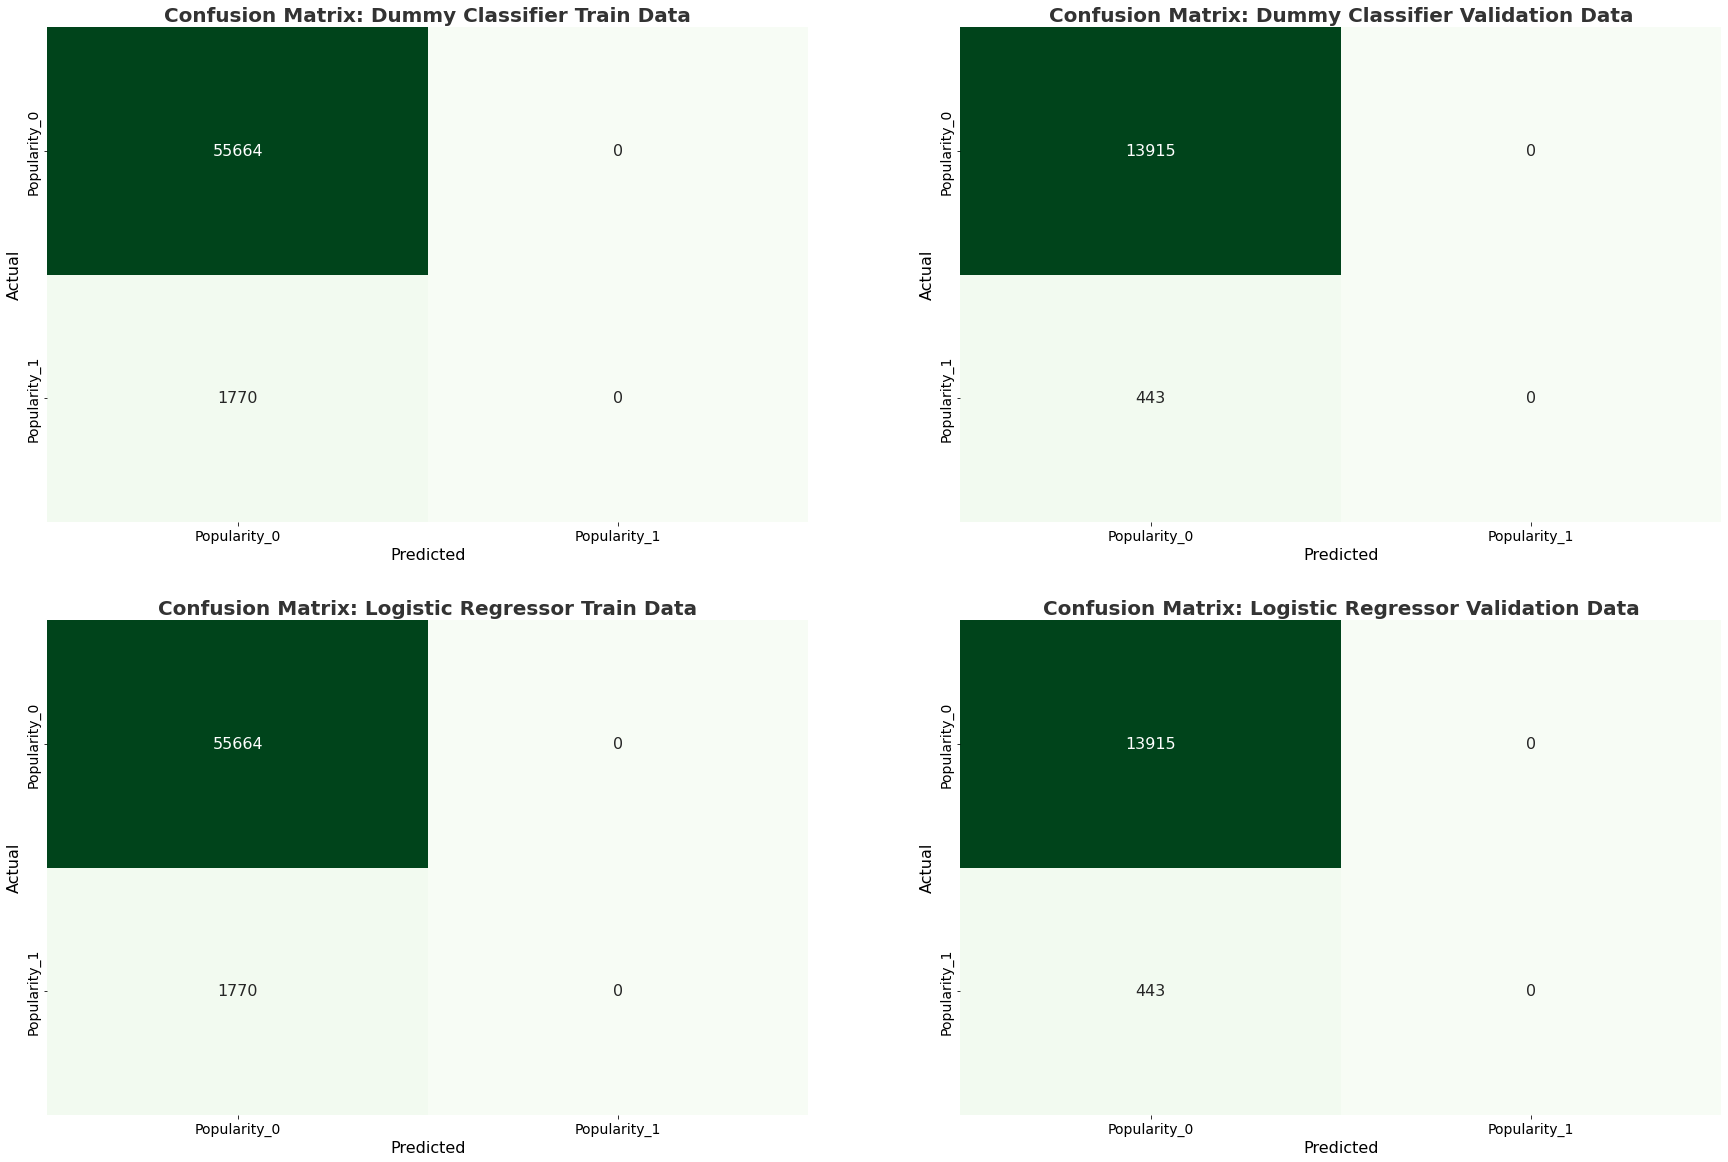

In [74]:
cm_dummy_t = confusion_matrix(y_train_fold, dummy_pred_train)
cm_dummy_v = confusion_matrix(y_val_fold, dummy_pred_val)
cm_log_t = confusion_matrix(y_train_fold, log_pred_train)
cm_log_v = confusion_matrix(y_val_fold, log_pred_val)




fig, axes = plt.subplots(2, 2, figsize=(30, 20))
tick_labels = ['Popularity_0','Popularity_1']
# Confusion Matrix: Dummy Classifier - Train Data
sns.heatmap(cm_dummy_t, annot=True, cmap='Greens', fmt='g', cbar=False, annot_kws={'fontsize': 16}, ax=axes[0, 0], xticklabels=tick_labels, yticklabels=tick_labels)
axes[0, 0].set_title('Confusion Matrix: Dummy Classifier Train Data', size=20, alpha=0.8, weight='bold')
axes[0, 0].set_xlabel('Predicted', size=16)
axes[0, 0].set_ylabel('Actual', size=16)
axes[0, 0].tick_params(axis='x', labelsize=14)
axes[0, 0].tick_params(axis='y', labelsize=14)

# Confusion Matrix: Dummy Classifier - Validation Data
sns.heatmap(cm_dummy_v, annot=True, cmap='Greens', fmt='g', cbar=False, annot_kws={'fontsize': 16}, ax=axes[0, 1], xticklabels=tick_labels, yticklabels=tick_labels)
axes[0, 1].set_title('Confusion Matrix: Dummy Classifier Validation Data', size=20, alpha=0.8, weight='bold')
axes[0, 1].set_xlabel('Predicted', size=16)
axes[0, 1].set_ylabel('Actual', size=16)
axes[0, 1].tick_params(axis='x', labelsize=14)
axes[0, 1].tick_params(axis='y', labelsize=14)

# Confusion Matrix: Logistic Regressor - Train Data
sns.heatmap(cm_log_t, annot=True, cmap='Greens', fmt='g', cbar=False, annot_kws={'fontsize': 16}, ax=axes[1, 0], xticklabels=tick_labels, yticklabels=tick_labels)
axes[1, 0].set_title('Confusion Matrix: Logistic Regressor Train Data', size=20, alpha=0.8, weight='bold')
axes[1, 0].set_xlabel('Predicted', size=16)
axes[1, 0].set_ylabel('Actual', size=16)
axes[1, 0].tick_params(axis='x', labelsize=14)
axes[1, 0].tick_params(axis='y', labelsize=14)

# Confusion Matrix: Logistic Regressor - Validation Data
sns.heatmap(cm_log_v, annot=True, cmap='Greens', fmt='g', cbar=False, annot_kws={'fontsize': 16}, ax=axes[1, 1], xticklabels=tick_labels, yticklabels=tick_labels)
axes[1, 1].set_title('Confusion Matrix: Logistic Regressor Validation Data', size=20, alpha=0.8, weight='bold')
axes[1, 1].set_xlabel('Predicted', size=16)
axes[1, 1].set_ylabel('Actual', size=16)
axes[1, 1].tick_params(axis='x', labelsize=14)
axes[1, 1].tick_params(axis='y', labelsize=14)

plt.show()

## D - 6: Resampling

Now we're going to implement a resampling technique to address the class imbalance issue in the dataset. Resampling involves adding artificial data to the dataset in order to balance the classes. There are various ways to do this, including undersampling and oversampling, or a combination of both.

Oversampling involves adding more examples to the minority class until the classes are balanced, while undersampling involves removing data from the majority class until the classes are balanced. There are several algorithms that can be used for this process. In this project, we will be using Random Oversampling, SMOTE (Synthetic Minority Over-sampling Technique), Near Miss, and a hybrid technique that combines random oversampling and random undersampling to address the class imbalance issue. 

### Resampling

In [75]:
classifiers = {
    'LogisticRegression': LogisticRegression(),
    'KNearest': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier()  
}

### Oversampling

Oversampling is a technique used when we have limited information on the minority class, which is the rare class, compared to the majority class. In this approach, the number of occurrences of the minority class is increased by creating artificial events using various techniques. This helps to balance the class distribution and provide more training examples for the minority class. The goal is to improve the representation of the minority class in the dataset, which can lead to better model performance and more accurate predictions for the minority class.

#### Random OverSampling

Random oversampling involves randomly duplicating examples in the minority class.

In [76]:
ros = RandomOverSampler(sampling_strategy='minority')
X_ros, y_ros = ros.fit_resample(X_train_fold, y_train_fold)
print('Original dataset shape', Counter(y_train_fold))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 55664, 1: 1770})
Resample dataset shape Counter({0: 55664, 1: 55664})


Model: LogisticRegression
Accuracy:  0.5894274968658587
Precision: 0.05501142670584394
Recall:    0.7607223476297968
F1-Score:  0.10260313594154362
------------------------------------------------------------
------------------------------------------------------------


c:\Users\SAMSUNG\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model: KNearest
Accuracy:  0.8853600780052933
Precision: 0.0650759219088937
Recall:    0.20316027088036118
F1-Score:  0.09857612267250822
------------------------------------------------------------
------------------------------------------------------------
Model: DecisionTreeClassifier
Accuracy:  0.9336955007661234
Precision: 0.06937394247038917
Recall:    0.09255079006772009
F1-Score:  0.0793036750483559
------------------------------------------------------------
------------------------------------------------------------
Model: Random Forest
Accuracy:  0.9613455913079816
Precision: 0.08208955223880597
Recall:    0.024830699774266364
F1-Score:  0.038128249566724434
------------------------------------------------------------
------------------------------------------------------------
Model: XGBoost
Accuracy:  0.8478200306449366
Precision: 0.07345739471106758
Recall:    0.33860045146726864
F1-Score:  0.12072434607645875
------------------------------------------------------------

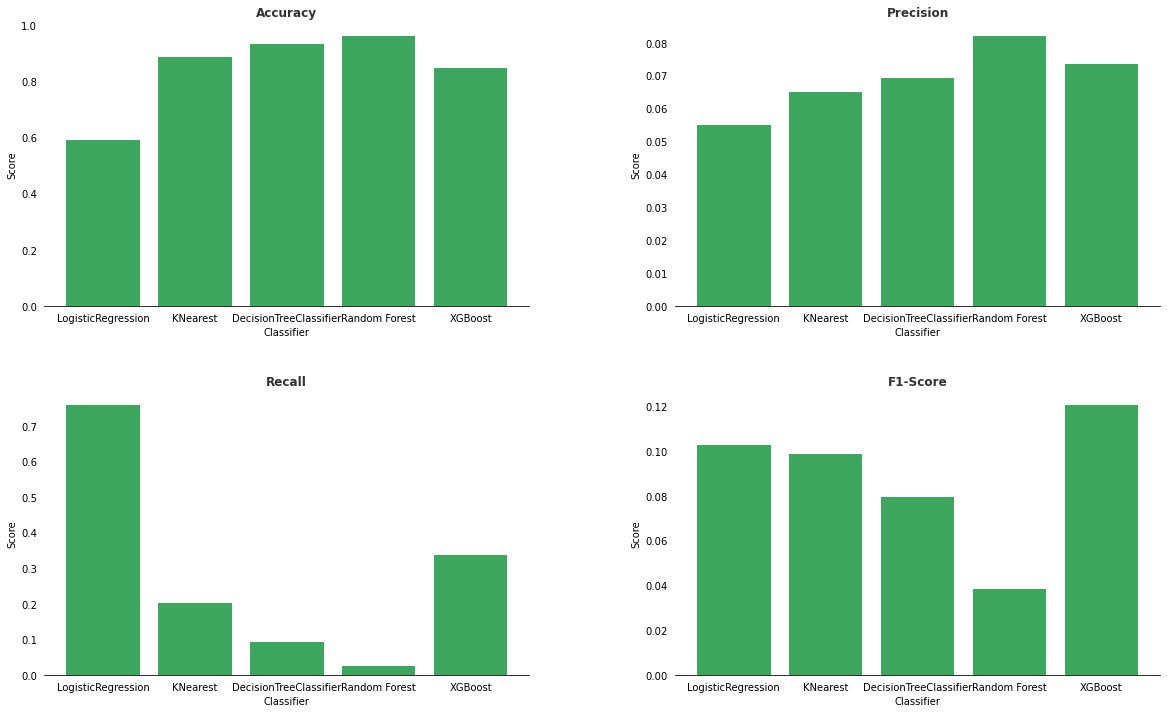

In [77]:
# Create empty lists to store evaluation metrics for each classifier
accuracy_vals_ros = []
precision_vals_ros = []
recall_vals_ros = []
f1_vals_ros = []

# Loop through classifiers
for clf_name, clf in classifiers.items():
    
    #Train the classifier
    clf.fit(X_ros, y_ros)
    
    #Make prediction on validation data
    y_val_pred = clf.predict(X_val_fold)
    
    #Calculate evalution metrics
    accuracy_val = accuracy_score(y_val_fold, y_val_pred)
    recall_val = recall_score(y_val_fold, y_val_pred)
    precision_val = precision_score(y_val_fold, y_val_pred, zero_division='warn')
    f1_val = f1_score(y_val_fold, y_val_pred)
    
    # Append evaluation metrics to respective lists
    accuracy_vals_ros.append(accuracy_val)
    precision_vals_ros.append(precision_val)
    recall_vals_ros.append(recall_val)
    f1_vals_ros.append(f1_val)
    
    # Print evaluation metrics 
    print(f'Model: {clf_name}')
    print(f'Accuracy:  {accuracy_val}')
    print(f'Precision: {precision_val}')
    print(f'Recall:    {recall_val}')
    print(f'F1-Score:  {f1_val}')
    print('------------------------------------------------------------')
    print('------------------------------------------------------------')

# Create a 2x2 subplot for each metric
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

# Plot accuracy
axs[0, 0].bar(classifiers.keys(), accuracy_vals_ros, color= '#3DA65F')
axs[0, 0].set_title('Accuracy', alpha = 0.8, weight = 'bold')
axs[0, 0].set_xlabel('Classifier')
axs[0, 0].set_ylabel('Score')
axs[0, 0].spines['top'].set_visible(False)
axs[0, 0].spines['right'].set_visible(False)
axs[0, 0].spines['left'].set_visible(False)
axs[0, 0].tick_params(bottom = False, left = False)



# Plot precision
axs[0, 1].bar(classifiers.keys(), precision_vals_ros, color= '#3DA65F')
axs[0, 1].set_title('Precision', alpha = 0.8, weight = 'bold')
axs[0, 1].set_xlabel('Classifier')
axs[0, 1].set_ylabel('Score')
axs[0, 1].spines['top'].set_visible(False)
axs[0, 1].spines['right'].set_visible(False)
axs[0, 1].spines['left'].set_visible(False)
axs[0, 1].tick_params(bottom = False, left = False)



# Plot recall
axs[1, 0].bar(classifiers.keys(), recall_vals_ros, color= '#3DA65F')
axs[1, 0].set_title('Recall', alpha = 0.8, weight = 'bold')
axs[1, 0].set_xlabel('Classifier')
axs[1, 0].set_ylabel('Score')
axs[1, 0].spines['top'].set_visible(False)
axs[1, 0].spines['right'].set_visible(False)
axs[1, 0].spines['left'].set_visible(False)
axs[1, 0].tick_params(bottom = False, left = False)

# Plot F1-Score
axs[1, 1].bar(classifiers.keys(), f1_vals_ros, color= '#3DA65F')
axs[1, 1].set_title('F1-Score', alpha = 0.8, weight = 'bold')
axs[1, 1].set_xlabel('Classifier')
axs[1, 1].set_ylabel('Score')
axs[1, 1].spines['top'].set_visible(False)
axs[1, 1].spines['right'].set_visible(False)
axs[1, 1].spines['left'].set_visible(False)
axs[1, 1].tick_params(bottom = False, left = False)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

#### SMOTE

SMOTE is one of the most popular oversampling techniques. Unlike random oversampling that only duplicates some random examples from the minority class, SMOTE generates examples based on the distance of each data (usually using Euclidean distance) and the minority class nearest neighbors, so the generated examples are different from the original minority class.

In [78]:
smote = SMOTE(sampling_strategy='minority')

X_smote, y_smote = smote.fit_resample(X_train_fold, y_train_fold)

print('Original dataset shape', Counter(y_train_fold))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 55664, 1: 1770})
Resample dataset shape Counter({0: 55664, 1: 55664})


Model: LogisticRegression
Accuracy:  0.6143613316617913
Precision: 0.05627177700348432
Recall:    0.7291196388261851
F1-Score:  0.10448002587740579
------------------------------------------------------------
------------------------------------------------------------


c:\Users\SAMSUNG\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model: KNearest
Accuracy:  0.8073547847889678
Precision: 0.05786067757898744
Recall:    0.3431151241534989
F1-Score:  0.0990228013029316
------------------------------------------------------------
------------------------------------------------------------
Model: DecisionTreeClassifier
Accuracy:  0.8600780052932163
Precision: 0.06692477876106195
Recall:    0.27313769751693
F1-Score:  0.10750777432252334
------------------------------------------------------------
------------------------------------------------------------
Model: Random Forest
Accuracy:  0.9245716673631424
Precision: 0.10880195599022005
Recall:    0.20090293453724606
F1-Score:  0.14115781126090407
------------------------------------------------------------
------------------------------------------------------------
Model: XGBoost
Accuracy:  0.8377907786599805
Precision: 0.07675044883303411
Recall:    0.3860045146726862
F1-Score:  0.12804193186072632
------------------------------------------------------------
-----

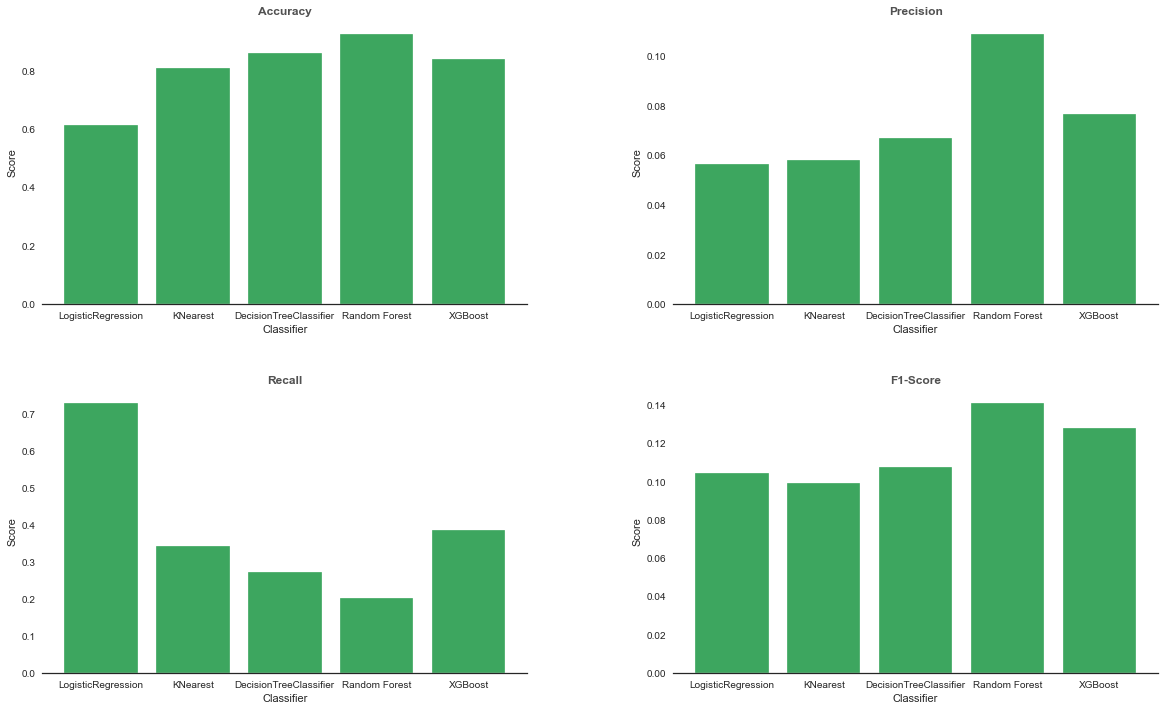

In [151]:
# Create empty lists to store evaluation metrics for each classifier
accuracy_vals_smote = []
precision_vals_smote = []
recall_vals_smote = []
f1_vals_smote = []



for clf_name, clf in classifiers.items():
    
    #Train the classifier
    clf.fit(X_smote, y_smote)
    
    #Make prediction on validation data
    y_val_pred = clf.predict(X_val_fold)
    
    #Calculate evalution metrics
    accuracy_val = accuracy_score(y_val_fold, y_val_pred)
    recall_val = recall_score(y_val_fold, y_val_pred)
    precision_val = precision_score(y_val_fold, y_val_pred, zero_division='warn')
    f1_val = f1_score(y_val_fold, y_val_pred)
    
    # Append evaluation metrics to respective lists
    accuracy_vals_smote.append(accuracy_val)
    precision_vals_smote.append(precision_val)
    recall_vals_smote.append(recall_val)
    f1_vals_smote.append(f1_val)
    
    # Print evaluation metrics 
    print(f'Model: {clf_name}')
    print(f'Accuracy:  {accuracy_val}')
    print(f'Precision: {precision_val}')
    print(f'Recall:    {recall_val}')
    print(f'F1-Score:  {f1_val}')
    print('------------------------------------------------------------')
    print('------------------------------------------------------------')
    
# Create a 2x2 subplot for each metric
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

# Plot accuracy
axs[0, 0].bar(classifiers.keys(), accuracy_vals_smote, color= '#3DA65F')
axs[0, 0].set_title('Accuracy', alpha = 0.8, weight = 'bold')
axs[0, 0].set_xlabel('Classifier')
axs[0, 0].set_ylabel('Score')
axs[0, 0].spines['top'].set_visible(False)
axs[0, 0].spines['right'].set_visible(False)
axs[0, 0].spines['left'].set_visible(False)
axs[0, 0].tick_params(bottom = False, left = False)



# Plot precision
axs[0, 1].bar(classifiers.keys(), precision_vals_smote, color= '#3DA65F')
axs[0, 1].set_title('Precision', alpha = 0.8, weight = 'bold')
axs[0, 1].set_xlabel('Classifier')
axs[0, 1].set_ylabel('Score')
axs[0, 1].spines['top'].set_visible(False)
axs[0, 1].spines['right'].set_visible(False)
axs[0, 1].spines['left'].set_visible(False)
axs[0, 1].tick_params(bottom = False, left = False)

# Plot recall
axs[1, 0].bar(classifiers.keys(), recall_vals_smote, color= '#3DA65F')
axs[1, 0].set_title('Recall', alpha = 0.8, weight = 'bold')
axs[1, 0].set_xlabel('Classifier')
axs[1, 0].set_ylabel('Score')
axs[1, 0].spines['top'].set_visible(False)
axs[1, 0].spines['right'].set_visible(False)
axs[1, 0].spines['left'].set_visible(False)
axs[1, 0].tick_params(bottom = False, left = False)


# Plot F1-Score
axs[1, 1].bar(classifiers.keys(), f1_vals_smote, color= '#3DA65F')
axs[1, 1].set_title('F1-Score', alpha = 0.8, weight = 'bold')
axs[1, 1].set_xlabel('Classifier')
axs[1, 1].set_ylabel('Score')
axs[1, 1].spines['top'].set_visible(False)
axs[1, 1].spines['right'].set_visible(False)
axs[1, 1].spines['left'].set_visible(False)
axs[1, 1].tick_params(bottom = False, left = False)

# Adjust spacing between subplots
sns.set_style("white")
plt.subplots_adjust(hspace=0.3, wspace=0.3)    


### Under sampling

Undersampling techniques are used to remove examples from the training dataset that belong to the majority class in order to achieve a more balanced class distribution. This approach is appropriate when there is a sufficient amount of data available for accurate analysis. In this case, all the rare events from the minority class are retained, while the number of abundant events (majority class) is reduced, resulting in two equally sized classes. 

#### Near-Miss

Near Miss refers to a collection of undersampling methods that select examples based on the distance of majority class examples to minority class examples. In the standart near miss, we keep events from the majority class that have the smallest average distance to the three closest events from the minority class.

In [80]:
nm = NearMiss()

X_nm, y_nm = nm.fit_resample(X_train_fold, y_train_fold)

print('Original dataset shape', Counter(y_train_fold))
print('Resample dataset shape', Counter(y_nm))

Original dataset shape Counter({0: 55664, 1: 1770})
Resample dataset shape Counter({0: 1770, 1: 1770})


Model: LogisticRegression
Accuracy:  0.21479314667781027
Precision: 0.026161518943039638
Recall:    0.6749435665914221
F1-Score:  0.05037061994609165
------------------------------------------------------------
------------------------------------------------------------


c:\Users\SAMSUNG\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model: KNearest
Accuracy:  0.33716395041092073
Precision: 0.026606844741235394
Recall:    0.5756207674943566
F1-Score:  0.05086267078887005
------------------------------------------------------------
------------------------------------------------------------
Model: DecisionTreeClassifier
Accuracy:  0.22454380832985096
Precision: 0.02932112353614511
Recall:    0.7516930022573364
F1-Score:  0.05644067796610169
------------------------------------------------------------
------------------------------------------------------------
Model: Random Forest
Accuracy:  0.1283604958907926
Precision: 0.028290090653329165
Recall:    0.8171557562076749
F1-Score:  0.05468690988745373
------------------------------------------------------------
------------------------------------------------------------
Model: XGBoost
Accuracy:  0.1367878534614849
Precision: 0.027964294178055137
Recall:    0.7990970654627539
F1-Score:  0.05403755151885208
-----------------------------------------------------------

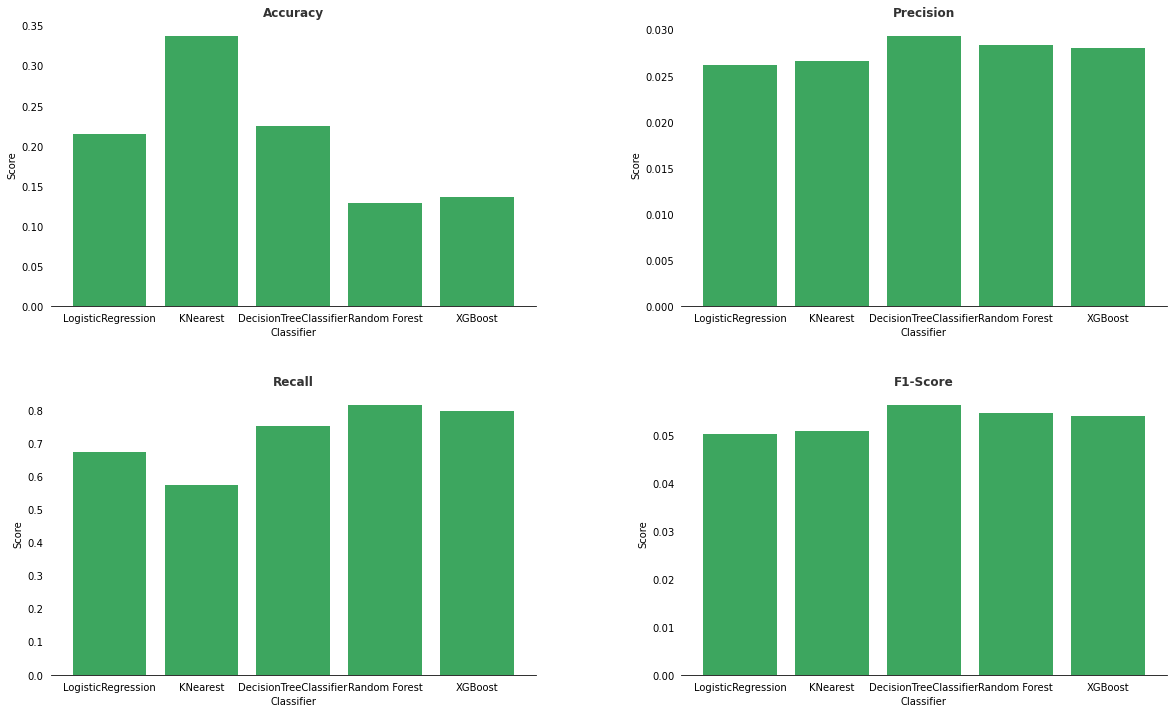

In [81]:
# Create empty lists to store evaluation metrics for each classifier
accuracy_vals_nm = []
precision_vals_nm = []
recall_vals_nm = []
f1_vals_nm = []



for clf_name, clf in classifiers.items():
    
    #Train the classifier
    clf.fit(X_nm, y_nm)
    
    #Make prediction on validation data
    y_val_pred = clf.predict(X_val_fold)
    
    #Calculate evalution metrics
    accuracy_val = accuracy_score(y_val_fold, y_val_pred)
    recall_val = recall_score(y_val_fold, y_val_pred)
    precision_val = precision_score(y_val_fold, y_val_pred, zero_division='warn')
    f1_val = f1_score(y_val_fold, y_val_pred)
    
    # Append evaluation metrics to respective lists
    accuracy_vals_nm.append(accuracy_val)
    precision_vals_nm.append(precision_val)
    recall_vals_nm.append(recall_val)
    f1_vals_nm.append(f1_val)
    
    # Print evaluation metrics 
    print(f'Model: {clf_name}')
    print(f'Accuracy:  {accuracy_val}')
    print(f'Precision: {precision_val}')
    print(f'Recall:    {recall_val}')
    print(f'F1-Score:  {f1_val}')
    print('------------------------------------------------------------')
    print('------------------------------------------------------------')
    
# Create a 2x2 subplot for each metric
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

# Plot accuracy
axs[0, 0].bar(classifiers.keys(), accuracy_vals_nm, color= '#3DA65F')
axs[0, 0].set_title('Accuracy', alpha = 0.8, weight = 'bold')
axs[0, 0].set_xlabel('Classifier')
axs[0, 0].set_ylabel('Score')
axs[0, 0].spines['top'].set_visible(False)
axs[0, 0].spines['right'].set_visible(False)
axs[0, 0].spines['left'].set_visible(False)
axs[0, 0].tick_params(bottom = False, left = False)

# Plot precision
axs[0, 1].bar(classifiers.keys(), precision_vals_nm, color= '#3DA65F')
axs[0, 1].set_title('Precision', alpha = 0.8, weight = 'bold')
axs[0, 1].set_xlabel('Classifier')
axs[0, 1].set_ylabel('Score')
axs[0, 1].spines['top'].set_visible(False)
axs[0, 1].spines['right'].set_visible(False)
axs[0, 1].spines['left'].set_visible(False)
axs[0, 1].tick_params(bottom = False, left = False)

# Plot recall
axs[1, 0].bar(classifiers.keys(), recall_vals_nm, color= '#3DA65F')
axs[1, 0].set_title('Recall', alpha = 0.8, weight = 'bold')
axs[1, 0].set_xlabel('Classifier')
axs[1, 0].set_ylabel('Score')
axs[1, 0].spines['top'].set_visible(False)
axs[1, 0].spines['right'].set_visible(False)
axs[1, 0].spines['left'].set_visible(False)
axs[1, 0].tick_params(bottom = False, left = False)


# Plot F1-Score
axs[1, 1].bar(classifiers.keys(), f1_vals_nm, color= '#3DA65F')
axs[1, 1].set_title('F1-Score', alpha = 0.8, weight = 'bold')
axs[1, 1].set_xlabel('Classifier')
axs[1, 1].set_ylabel('Score')
axs[1, 1].spines['top'].set_visible(False)
axs[1, 1].spines['right'].set_visible(False)
axs[1, 1].spines['left'].set_visible(False)
axs[1, 1].tick_params(bottom = False, left = False)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

#### Hybrid

Hybridization techniques combine both undersampling and oversampling methods to optimize classifier model performance on generated samples. SMOTE-Tomek, a hybrid technique, combines SMOTE for oversampling the minority class with Tomek Links for undersampling the majority class.

SMOTE is an oversampling method that synthesizes new plausible examples in the minority class. Tomek Links refers to a method for identifying pairs of nearest neighbors in a dataset that have different classes. Removing one or both of the examples in these pairs (such as the examples in the majority class) has the effect of making the decision boundary in the training dataset less noisy or ambiguous.

SMOTE-Tomek results in a more balanced dataset with improved decision boundary for machine learning models, addressing the class imbalance issue and enhancing model performance on imbalanced data.

In [82]:
hybrid = SMOTETomek()

X_hybrid, y_hybrid = hybrid.fit_resample(X_train_fold, y_train_fold)

print('Original dataset shape', Counter(y_train_fold))
print('Resample dataset shape', Counter(y_hybrid))

Original dataset shape Counter({0: 55664, 1: 1770})
Resample dataset shape Counter({0: 55536, 1: 55536})


Model: LogisticRegression
Accuracy:  0.6149185123276222
Precision: 0.056350314026517793
Recall:    0.7291196388261851
F1-Score:  0.10461538461538461
------------------------------------------------------------
------------------------------------------------------------


c:\Users\SAMSUNG\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model: KNearest
Accuracy:  0.8069368992895947
Precision: 0.05906853464596744
Recall:    0.35214446952595935
F1-Score:  0.10116731517509728
------------------------------------------------------------
------------------------------------------------------------
Model: DecisionTreeClassifier
Accuracy:  0.8526953614709569
Precision: 0.06092436974789916
Recall:    0.2618510158013544
F1-Score:  0.09884959522795056
------------------------------------------------------------
------------------------------------------------------------
Model: Random Forest
Accuracy:  0.9232483632817942
Precision: 0.10727056019070322
Recall:    0.20316027088036118
F1-Score:  0.140405616224649
------------------------------------------------------------
------------------------------------------------------------
Model: XGBoost
Accuracy:  0.8375121883270651
Precision: 0.07661290322580645
Recall:    0.3860045146726862
F1-Score:  0.12785046728971963
------------------------------------------------------------
---

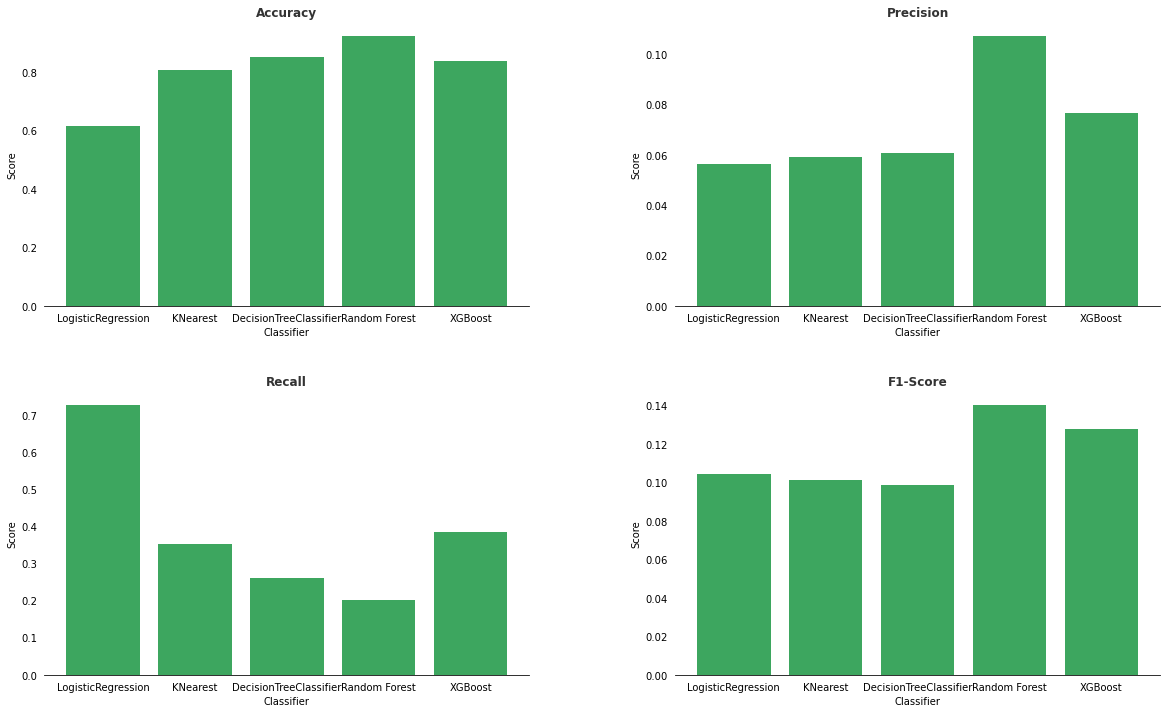

In [83]:
# Create empty lists to store evaluation metrics for each classifier
accuracy_vals_hybrid = []
precision_vals_hybrid = []
recall_vals_hybrid = []
f1_vals_hybrid = []

for clf_name, clf in classifiers.items():
    
    #Train the classifier
    clf.fit(X_hybrid, y_hybrid)
    
    #Make prediction on validation data
    y_val_pred = clf.predict(X_val_fold)
    
    #Calculate evalution metrics
    accuracy_val = accuracy_score(y_val_fold, y_val_pred)
    recall_val = recall_score(y_val_fold, y_val_pred)
    precision_val = precision_score(y_val_fold, y_val_pred, zero_division='warn')
    f1_val = f1_score(y_val_fold, y_val_pred)
    
    # Append evaluation metrics to respective lists
    accuracy_vals_hybrid.append(accuracy_val)
    precision_vals_hybrid.append(precision_val)
    recall_vals_hybrid.append(recall_val)
    f1_vals_hybrid.append(f1_val)
    
    # Print evaluation metrics 
    print(f'Model: {clf_name}')
    print(f'Accuracy:  {accuracy_val}')
    print(f'Precision: {precision_val}')
    print(f'Recall:    {recall_val}')
    print(f'F1-Score:  {f1_val}')
    print('------------------------------------------------------------')
    print('------------------------------------------------------------')
    
    
# Create a 2x2 subplot for each metric
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

# Plot accuracy
axs[0, 0].bar(classifiers.keys(), accuracy_vals_hybrid, color= '#3DA65F')
axs[0, 0].set_title('Accuracy', alpha = 0.8, weight = 'bold')
axs[0, 0].set_xlabel('Classifier')
axs[0, 0].set_ylabel('Score')
axs[0, 0].spines['top'].set_visible(False)
axs[0, 0].spines['right'].set_visible(False)
axs[0, 0].spines['left'].set_visible(False)
axs[0, 0].tick_params(bottom = False, left = False)



# Plot precision
axs[0, 1].bar(classifiers.keys(), precision_vals_hybrid, color= '#3DA65F')
axs[0, 1].set_title('Precision', alpha = 0.8, weight = 'bold')
axs[0, 1].set_xlabel('Classifier')
axs[0, 1].set_ylabel('Score')
axs[0, 1].spines['top'].set_visible(False)
axs[0, 1].spines['right'].set_visible(False)
axs[0, 1].spines['left'].set_visible(False)
axs[0, 1].tick_params(bottom = False, left = False)



# Plot recall
axs[1, 0].bar(classifiers.keys(), recall_vals_hybrid, color= '#3DA65F')
axs[1, 0].set_title('Recall', alpha = 0.8, weight = 'bold')
axs[1, 0].set_xlabel('Classifier')
axs[1, 0].set_ylabel('Score')
axs[1, 0].spines['top'].set_visible(False)
axs[1, 0].spines['right'].set_visible(False)
axs[1, 0].spines['left'].set_visible(False)
axs[1, 0].tick_params(bottom = False, left = False)

# Plot F1-Score
axs[1, 1].bar(classifiers.keys(), f1_vals_hybrid, color= '#3DA65F')
axs[1, 1].set_title('F1-Score', alpha = 0.8, weight = 'bold')
axs[1, 1].set_xlabel('Classifier')
axs[1, 1].set_ylabel('Score')
axs[1, 1].spines['top'].set_visible(False)
axs[1, 1].spines['right'].set_visible(False)
axs[1, 1].spines['left'].set_visible(False)
axs[1, 1].tick_params(bottom = False, left = False)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

For this project, Precision is our primary evaluation metric. We aim to select the model and resampling technique that yield the highest precision scores. From the results obtained, the Random Forest model consistently outperforms other models across all resampling options. Among the resampling techniques, the oversampling SMOTE achieves the highest precision score of ~0.11 (slightly above SMOTETomek algorithm that performed ~0.107), making it the preferred choice for this project.

### Hyperparameter Tuning the Random Forest and Evaluation

Hyperparameter tuning is important to optimize performance. Hyperparameters must be set by the data scientist before training. In the case of a random forest, hyperparameters include the number of decision trees in the forest and the number of features considered by each tree when splitting a node. Hyperparameter tuning relies more on experimental results than theory, and thus the best method to determine the optimal settings is to try many different combinations evaluate the performance of each model. 

Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

#### Tuning Random Forest

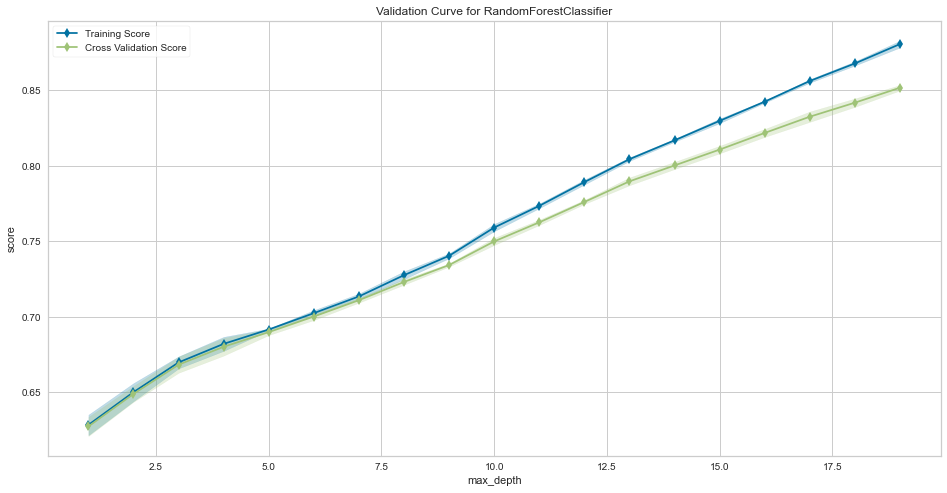

<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

In [98]:
fig, ax = plt.subplots(figsize = (16, 8))

vc_viz = ValidationCurve(RandomForestClassifier(n_estimators=100),
                         param_name="max_depth",
                         param_range=np.arange(1,20),
                         cv = 5,
                         n_jobs = -1,
                         scoring='precision')
vc_viz.fit(X_smote, y_smote)
vc_viz.poof()

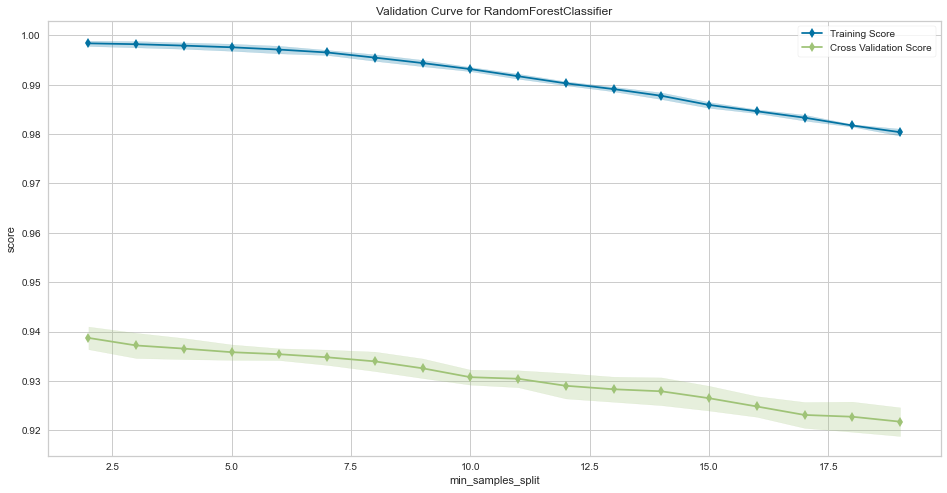

<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>

In [99]:
fig, ax = plt.subplots(figsize = (16, 8))

vc2_viz = ValidationCurve(RandomForestClassifier(n_estimators=100),
                         param_name="min_samples_split",
                         param_range=np.arange(2,20),
                         cv = 5,
                         n_jobs = -1,
                         scoring='precision')
vc2_viz.fit(X_smote, y_smote)
vc2_viz.poof()

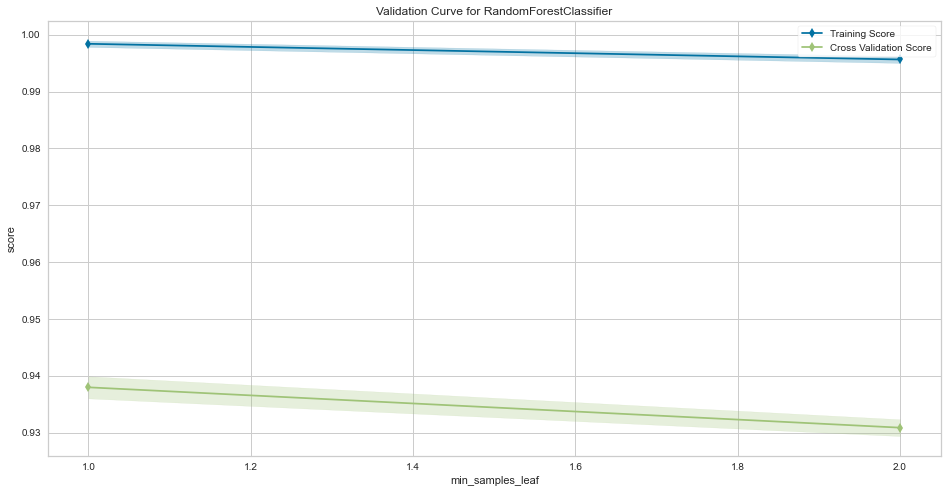

<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_leaf', ylabel='score'>

In [100]:
fig, ax = plt.subplots(figsize = (16, 8))

vc3_viz = ValidationCurve(RandomForestClassifier(n_estimators=100),
                         param_name="min_samples_leaf",
                         param_range=np.arange(1,3),
                         cv = 5,
                         n_jobs = -1,
                         scoring='precision')
vc3_viz.fit(X_smote, y_smote)
vc3_viz.poof()

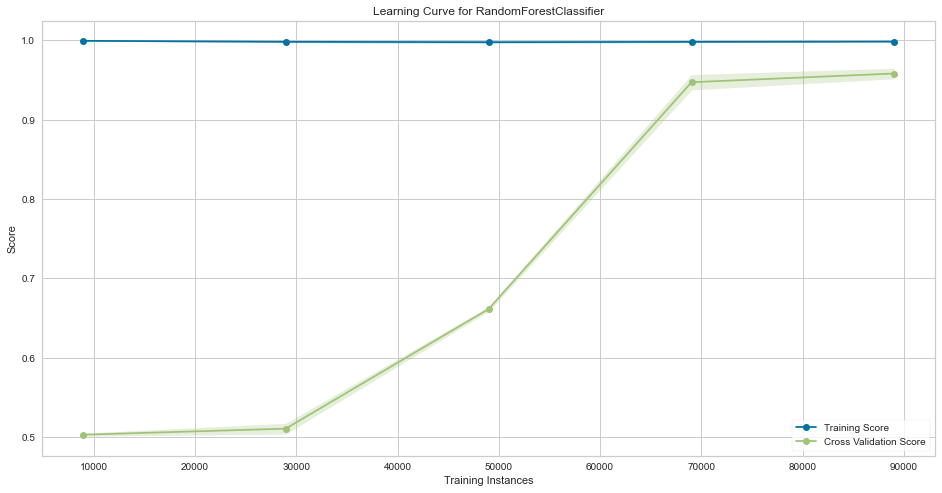

<AxesSubplot:title={'center':'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [97]:
fig, ax = plt.subplots(figsize = (16, 8))

lc_viz = LearningCurve(RandomForestClassifier(n_estimators=100),
                         cv = 5,
                         n_jobs = -1,
                        )
lc_viz.fit(X_smote, y_smote)
lc_viz.poof()

In [103]:
y_train_fold_array = y_train_fold.values
y_val_fold_array = y_val_fold.values

In [107]:
# Number of trees in random forest
n_estimators = [3, 10, 50, 100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [5, 10, 15, 20, None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]
# Method of selecting samples for training each tree
bootstrap = [True, False]
#Weights associated with classes
class_weight = ['balanced', None]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth ,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight': class_weight }

print(random_grid)

{'n_estimators': [3, 10, 50, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 3], 'bootstrap': [True, False], 'class_weight': ['balanced', None]}


In [110]:
#RANDOM FOREST: SMOTE
accuracy_lst_rf = []
precision_lst_rf = []
recall_lst_rf = []
f1_lst_rf = []
auc_lst_rf = []


# Set error_score to raise in RandomizedSearchCV
rf_grid = RandomizedSearchCV(RandomForestClassifier(), random_grid, random_state=42)

start = time.time()
count = 0

# Start the loop for cross-validation
for train, test in StratifiedKFold().split(X_train_fold, y_train_fold_array):
    
    # Define the imbalanced pipeline with SMOTETomek and the random forest model
    pipeline_rf = imbalanced_make_pipeline(SMOTE(), rf_grid)
    
    
    # Fit the pipeline to the training data
    model_rf = pipeline_rf.fit(X_train_fold[train], y_train_fold_array[train])
        
    # Select the best estimator from RandomizedSearchCV
    best_est_rf = rf_grid.best_estimator_
    
    # Make predictions on the test set
    prediction_rf = best_est_rf.predict(X_train_fold[test])
    
    # Append the evaluation metrics to their respective lists
    accuracy_lst_rf.append(pipeline_rf.score(X_train_fold[test], y_train_fold_array[test]))
    precision_lst_rf.append(precision_score(y_train_fold_array[test], prediction_rf, zero_division='warn'))
    recall_lst_rf.append(recall_score(y_train_fold_array[test], prediction_rf))
    f1_lst_rf.append(f1_score(y_train_fold_array[test], prediction_rf))
    auc_lst_rf.append(roc_auc_score(y_train_fold_array[test], prediction_rf))
    
    count = count + 1
    print(f"kfold nº: {count}")
    
    # Print the current fold number and the intermediate time
    intervalo = time.time()
    print(f"Intermediate time: {(intervalo - start)/60:.1f} minutes")
    print()
    
    # Print the best hyperparameters for the random forest model

print('---' * 20)
print(f"Best estimators for RF: {rf_grid.best_params_}")

# Print the mean of the evaluation metrics across all folds
print('---' * 20)
print('Results')
print(f"Accuracy:  {np.mean(accuracy_lst_rf)}")
print(f"Precision: {np.mean(precision_lst_rf)}")
print(f"Recall:    {np.mean(recall_lst_rf)}")
print(f"F1:        {np.mean(f1_lst_rf)}")
print(f"AUC:       {np.mean(auc_lst_rf)}")
print('---' * 20)

# printing the total time of cross-validation

end = time.time()
print(f"Time of the loop for cross-validation: {(end - start)/60:.1f} minutes")

kfold nº: 1
Intermediate time: 7.4 minutes

kfold nº: 2
Intermediate time: 15.8 minutes

kfold nº: 3
Intermediate time: 23.4 minutes

kfold nº: 4
Intermediate time: 31.7 minutes

kfold nº: 5
Intermediate time: 39.3 minutes

------------------------------------------------------------
Best estimators for RF: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'class_weight': None, 'bootstrap': False}
------------------------------------------------------------
Results
Accuracy:  0.9361005493404175
Precision: 0.09829080782419891
Recall:    0.1310734463276836
F1:        0.11228304684086106
AUC:       0.5463860965924024
------------------------------------------------------------
Time of the loop for cross-validation: 39.3 minutes


In [111]:
#RANDOM FOREST: SMOTETOMEK
accuracy_lst_rf = []
precision_lst_rf = []
recall_lst_rf = []
f1_lst_rf = []
auc_lst_rf = []


# Set error_score to raise in RandomizedSearchCV
rf_grid = RandomizedSearchCV(RandomForestClassifier(), random_grid, random_state=42)

start = time.time()
count = 0

# Start the loop for cross-validation
for train, test in StratifiedKFold().split(X_train_fold, y_train_fold_array):
    
    # Define the imbalanced pipeline with SMOTETomek and the random forest model
    pipeline_rf = imbalanced_make_pipeline(SMOTETomek(), rf_grid)
    
    
    # Fit the pipeline to the training data
    model_rf = pipeline_rf.fit(X_train_fold[train], y_train_fold_array[train])
        
    # Select the best estimator from RandomizedSearchCV
    best_est_rf = rf_grid.best_estimator_
    
    # Make predictions on the test set
    prediction_rf = best_est_rf.predict(X_train_fold[test])
    
    # Append the evaluation metrics to their respective lists
    accuracy_lst_rf.append(pipeline_rf.score(X_train_fold[test], y_train_fold_array[test]))
    precision_lst_rf.append(precision_score(y_train_fold_array[test], prediction_rf, zero_division='warn'))
    recall_lst_rf.append(recall_score(y_train_fold_array[test], prediction_rf))
    f1_lst_rf.append(f1_score(y_train_fold_array[test], prediction_rf))
    auc_lst_rf.append(roc_auc_score(y_train_fold_array[test], prediction_rf))
    
    count = count + 1
    print(f"kfold nº: {count}")
    
    # Print the current fold number and the intermediate time
    intervalo = time.time()
    print(f"Intermediate time: {(intervalo - start)/60:.1f} minutes")
    print()
    
    # Print the best hyperparameters for the random forest model

print('---' * 20)
print(f"Best estimators for RF: {rf_grid.best_params_}")

# Print the mean of the evaluation metrics across all folds
print('---' * 20)
print('Results')
print(f"Accuracy:  {np.mean(accuracy_lst_rf)}")
print(f"Precision: {np.mean(precision_lst_rf)}")
print(f"Recall:    {np.mean(recall_lst_rf)}")
print(f"F1:        {np.mean(f1_lst_rf)}")
print(f"AUC:       {np.mean(auc_lst_rf)}")
print('---' * 20)

# printing the total time of cross-validation

end = time.time()
print(f"Time of the loop for cross-validation: {(end - start)/60:.1f} minutes")

kfold nº: 1
Intermediate time: 10.3 minutes

kfold nº: 2
Intermediate time: 20.9 minutes

kfold nº: 3
Intermediate time: 32.2 minutes

kfold nº: 4
Intermediate time: 43.6 minutes

kfold nº: 5
Intermediate time: 54.5 minutes

------------------------------------------------------------
Best estimators for RF: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'class_weight': None, 'bootstrap': False}
------------------------------------------------------------
Results
Accuracy:  0.9366751255319837
Precision: 0.09819419946866484
Recall:    0.12824858757062146
F1:        0.11118002017493026
AUC:       0.5453150036743248
------------------------------------------------------------
Time of the loop for cross-validation: 54.5 minutes


In [117]:

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
cv_grid = {
    'bootstrap': [ False],
    'max_depth': [5, 10, 15, None],
    'max_features': ['log2'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [80, 100, 110, 120], 
    'class_weight': [None]
}



In [118]:
accuracy_lst_cv = []
precision_lst_cv = []
recall_lst_cv = []
f1_lst_cv = []
auc_lst_cv = []


# Set error_score to raise in RandomizedSearchCV
cv_grid = GridSearchCV(RandomForestClassifier(), cv_grid)

start = time.time()
count = 0

# Start the loop for cross-validation
for train, test in StratifiedKFold().split(X_train_fold, y_train_fold_array):
    
    # Define the imbalanced pipeline with SMOTETomek and the random forest model
    pipeline_cv = imbalanced_make_pipeline(SMOTE(), cv_grid)
    
    
    # Fit the pipeline to the training data
    model_cv = pipeline_cv.fit(X_train_fold[train], y_train_fold_array[train])
        
    # Select the best estimator from RandomizedSearchCV
    best_est_cv = cv_grid.best_estimator_
    
    # Make predictions on the test set
    prediction_cv = best_est_cv.predict(X_train_fold[test])
    
    # Append the evaluation metrics to their respective lists
    accuracy_lst_cv.append(pipeline_cv.score(X_train_fold[test], y_train_fold_array[test]))
    precision_lst_cv.append(precision_score(y_train_fold_array[test], prediction_cv, zero_division='warn'))
    recall_lst_cv.append(recall_score(y_train_fold_array[test], prediction_cv))
    f1_lst_cv.append(f1_score(y_train_fold_array[test], prediction_cv))
    auc_lst_cv.append(roc_auc_score(y_train_fold_array[test], prediction_cv))
    
    count = count + 1
    print(f"kfold nº: {count}")
    
    # Print the current fold number and the intermediate time
    intervalo = time.time()
    print(f"Intermediate time: {(intervalo - start)/60:.1f} minutes")
    print()
    
    # Print the best hyperparameters for the random forest model

print('---' * 20)
print(f"Best estimators for RF: {rf_grid.best_params_}")

# Print the mean of the evaluation metrics across all folds
print('---' * 20)
print('Results')
print(f"Accuracy:  {np.mean(accuracy_lst_cv)}")
print(f"Precision: {np.mean(precision_lst_cv)}")
print(f"Recall:    {np.mean(recall_lst_cv)}")
print(f"F1:        {np.mean(f1_lst_cv)}")
print(f"AUC:       {np.mean(auc_lst_cv)}")
print('---' * 20)

# printing the total time of cross-validation

end = time.time()
print(f"Time of the loop for cross-validation: {(end - start)/60:.1f} minutes")

kfold nº: 1
Intermediate time: 133.1 minutes

kfold nº: 2
Intermediate time: 254.5 minutes

kfold nº: 3
Intermediate time: 549.0 minutes

kfold nº: 4
Intermediate time: 700.7 minutes

kfold nº: 5
Intermediate time: 864.4 minutes

------------------------------------------------------------
Best estimators for RF: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'class_weight': None, 'bootstrap': False}
------------------------------------------------------------
Results
Accuracy:  0.9386078026169565
Precision: 0.10058923399655298
Recall:    0.12485875706214689
F1:        0.11135751304704844
AUC:       0.5446710511711503
------------------------------------------------------------
Time of the loop for cross-validation: 864.4 minutes


After running tests to tune the model, we can observe a slight improvement in the estimator's performance. It's important to note that in the baseline model estimation, I didn't split the training data into cross-validation folds, which could have led to overoptimistic predictions. With the tuning and cross-validation steps, I obtained a more accurate result. To understand how the data behaves as we increase some parameters, I created graphs and ran a RandomSearch to establish a baseline. Initially, the tuning models were providing a precision of 0.6, which I improved through trial and error. Finally, I attempted a GridSearch to further optimize the model. The final model achieved better results, with a precision of 0.10 and an F1-score of 0.11.